In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint, solve_ivp

Given the coupled 1st-order ODEs are: 

$\dot{y} = x$, 

$\dot{x} = -y$.

The initial conditions are $y(0)=-1$ and $x(0)=1$.

The analytical solution can be calculated as follows: 

$\frac{dy}{dt} = x \rightarrow \frac{d}{dt} \left[- \frac{dx}{dt} \right] = x \rightarrow - \frac{d^2 x}{dt^2} + x = 0$

$\therefore$ the characteristic equation for this ODE is: $r^2 + 1 = 0 \rightarrow r_{1, 2} = \pm i$

$\therefore x(t) = c_1 \cos{t} + c_2 \sin{t}$. Also, $\frac{d x(t)}{dt} = -c_1 \sin{t} + c_2 \cos{t}$ 

After applying the initial conditions: 

$x(t) = \cos{t} + \sin{t}$ 

$y(t) = -\cos{t} + \sin{t}$

In [9]:
def dsdt(t, s):
    x, y = s
    return [-y, 
            x]

def solx(t):
    return np.cos(t) + np.sin(t)

def soly(t):
    return -np.cos(t) + np.sin(t)

In [10]:
#solve_ivp 
x0 = 1
y0 = -1
s0 = [x0, y0]
t=np.linspace(0, 2, 1000)

y1 = solve_ivp(dsdt, y0=s0, t_span=(np.min(t), np.max(t)), t_eval=t, method='RK45')

In [11]:
y1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.002002  , 0.004004  , 0.00600601, 0.00800801,
       0.01001001, 0.01201201, 0.01401401, 0.01601602, 0.01801802,
       0.02002002, 0.02202202, 0.02402402, 0.02602603, 0.02802803,
       0.03003003, 0.03203203, 0.03403403, 0.03603604, 0.03803804,
       0.04004004, 0.04204204, 0.04404404, 0.04604605, 0.04804805,
       0.05005005, 0.05205205, 0.05405405, 0.05605606, 0.05805806,
       0.06006006, 0.06206206, 0.06406406, 0.06606607, 0.06806807,
       0.07007007, 0.07207207, 0.07407407, 0.07607608, 0.07807808,
       0.08008008, 0.08208208, 0.08408408, 0.08608609, 0.08808809,
       0.09009009, 0.09209209, 0.09409409, 0.0960961 , 0.0980981 ,
       0.1001001 , 0.1021021 , 0.1041041 , 0.10610611, 0.10810811,
       0.11011011, 0.11211211, 0.11411411, 0.11611612, 0.11811812,
       0.12012012,

In [12]:
#analytic 
ansx=[]
ansy=[]
for i in t:
    x = solx(i)
    y = soly(i)
    ansx.append(x)
    ansy.append(y)
ansx=np.array(ansx)
ansy=np.array(ansy)

<IPython.core.display.Javascript object>


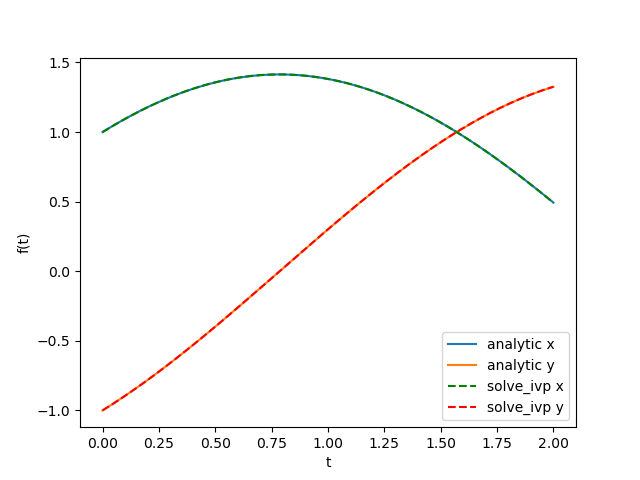

In [26]:
%matplotlib notebook
plt.figure()
plt.plot(t, ansx, label='analytic x')
plt.plot(t, ansy, label='analytic y')
plt.plot(t, y1.y[0], 'g--', label='solve_ivp x')
plt.plot(t, y1.y[1], 'r--', label='solve_ivp y')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend(loc='best')
plt.show()

In [25]:
err1 = np.abs((ansx-y1.y[0])*100)
err2 = np.abs((ansy-y1.y[1])*100)

print('time \t \t \t \t [solve_ivp x] \t \t \t \t [solve_ivp y]')
print('-'*123)
for i in range(1, len(t)):
    print(t[i], '\t \t', err1[i], '\t \t', err2[i])

time 	 	 	 	 [solve_ivp x] 	 	 	 	 [solve_ivp y]
---------------------------------------------------------------------------------------------------------------------------
0.002002002002002002 	 	 3.5090819139327323e-09 	 	 3.046385366189952e-09
0.004004004004004004 	 	 1.3227619000133473e-08 	 	 1.144188077617514e-08
0.006006006006006006 	 	 2.8013813491156725e-08 	 	 2.4140567322916695e-08
0.008008008008008008 	 	 4.681801613060088e-08 	 	 4.01867206178963e-08
0.01001001001001001 	 	 6.867968416202075e-08 	 	 5.8711624451035505e-08
0.012012012012012012 	 	 9.272413947769564e-08 	 	 7.893024012162186e-08
0.014014014014014014 	 	 1.1815939338077897e-07 	 	 1.0013804230268875e-07
0.016016016016016016 	 	 1.4427299355190826e-07 	 	 1.2170775498532294e-07
0.018018018018018018 	 	 1.7042873778905232e-07 	 	 1.4308602080959076e-07
0.02002002002002002 	 	 1.9606367640534472e-07 	 	 1.6379027023560866e-07
0.022022022022022022 	 	 2.2068478156000992e-07 	 	 1.834053020566273e-07
0.02402402402

1.6516516516516517 	 	 0.005251647807558157 	 	 0.05311862954429092
1.6536536536536537 	 	 0.005555804783174967 	 	 0.052929584532379614
1.6556556556556556 	 	 0.005863354610868843 	 	 0.05273965624008614
1.6576576576576576 	 	 0.006174281463688924 	 	 0.05254886589192154
1.6596596596596596 	 	 0.006488568953255669 	 	 0.05235723469114717
1.6616616616616617 	 	 0.006806200126374673 	 	 0.0521647838165995
1.6636636636636637 	 	 0.007127157461506162 	 	 0.05197153441980351
1.6656656656656657 	 	 0.007451422865289992 	 	 0.05177750762219713
1.6676676676676676 	 	 0.007778977669004039 	 	 0.05158272451215584
1.6696696696696696 	 	 0.008109802625111406 	 	 0.0513872061419951
1.6716716716716717 	 	 0.00844387790376322 	 	 0.05119097352526136
1.6736736736736737 	 	 0.008781183089257016 	 	 0.05099404763369009
1.6756756756756757 	 	 0.009121697176472932 	 	 0.05079644939438577
1.6776776776776776 	 	 0.009465398567432004 	 	 0.05059819968695756
1.6796796796796796 	 	 0.009812265067643544 	 	 0.